In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 900)
pd.set_option('display.width', 1000)

warnings.simplefilter(action='ignore', category=FutureWarning);
%matplotlib inline

In [2]:
# train
df = pd.read_csv('datasets/train.csv')
df.shape

(2051, 81)

In [3]:
# test
kaggle_data = pd.read_csv('datasets/test.csv')
kaggle_data.shape

(878, 80)

In [4]:
submission = pd.DataFrame({'Id': kaggle_data['Id']})
submission['SalePrice'] = df['SalePrice'].mean()
submission.head()

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609


In [5]:
submission.to_csv('datasets/mean_sub.csv', index=False)

In [6]:
#First we clean the data and explore a bit

In [7]:
kaggle_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       '

In [8]:
df.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Mas Vnr Type       1240
Fireplace Qu       1000
Lot Frontage        330
Garage Cond         114
Garage Qual         114
Garage Finish       114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Exterior 2nd          0
Exterior 1st          0
Exter Qual            0
Exter Cond            0
Foundation            0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
Year Built            0
Overall Cond          0
Overall Qual          0
House Style           0
Bldg Type             0
Condition 2           0
Heating               0
Heating QC      

In [9]:
columns_to_drop_na = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars','Total Bsmt SF','1st Flr SF','Garage Yr Blt','TotRms AbvGrd','Mas Vnr Area']
df.dropna(subset=columns_to_drop_na, inplace=True)

In [10]:
df['Lot Frontage'].fillna(0, inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

Pool QC            1906
Misc Feature       1853
Alley              1793
Fence              1537
Mas Vnr Type       1115
Fireplace Qu        887
Bsmt Exposure        48
BsmtFin Type 2       46
BsmtFin Type 1       45
Bsmt Cond            45
Bsmt Qual            45
Bsmt Half Bath        1
Bsmt Full Bath        1
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Land Slope            0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Lot Config            0
Utilities             0
Land Contour          0
Lot Shape             0
BsmtFin SF 1          0
Street                0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC      

### Brainstorm factors to go by: 

## Ten in total ##

# Numerical:
Lot Area 
Lot frontage [yard]
Garage Area
Garage Cars

# Non-Numerical:

Sale Type 
Overall Qual
Overall Cond
Kitchen Qual 

# Relationship Variables

Time stamps:

Year Built and year remodeled Year Remod/Add - If these are spaced apart then we hypothesize value is up.
If one not the other, value down (i.e. built but never remodeled)


In [12]:
# Next is Turn categorical variables into quantitative variables on a scale of 0-10 10 being best 0 worst etc. 
# Use groupby to see roughly which variables correspond with nicer houses and 
# therefore higher costs (it's what you would expect)

In [13]:
#Methodology: Start with heatmaps and histos for numerical comparsion to get the right direction
#Then work to Create Integer Encoding for The conditions of things
# One-Hot Categorical Data Where you only want to keep the top category and leave that digit at the True (1) value

<Axes: >

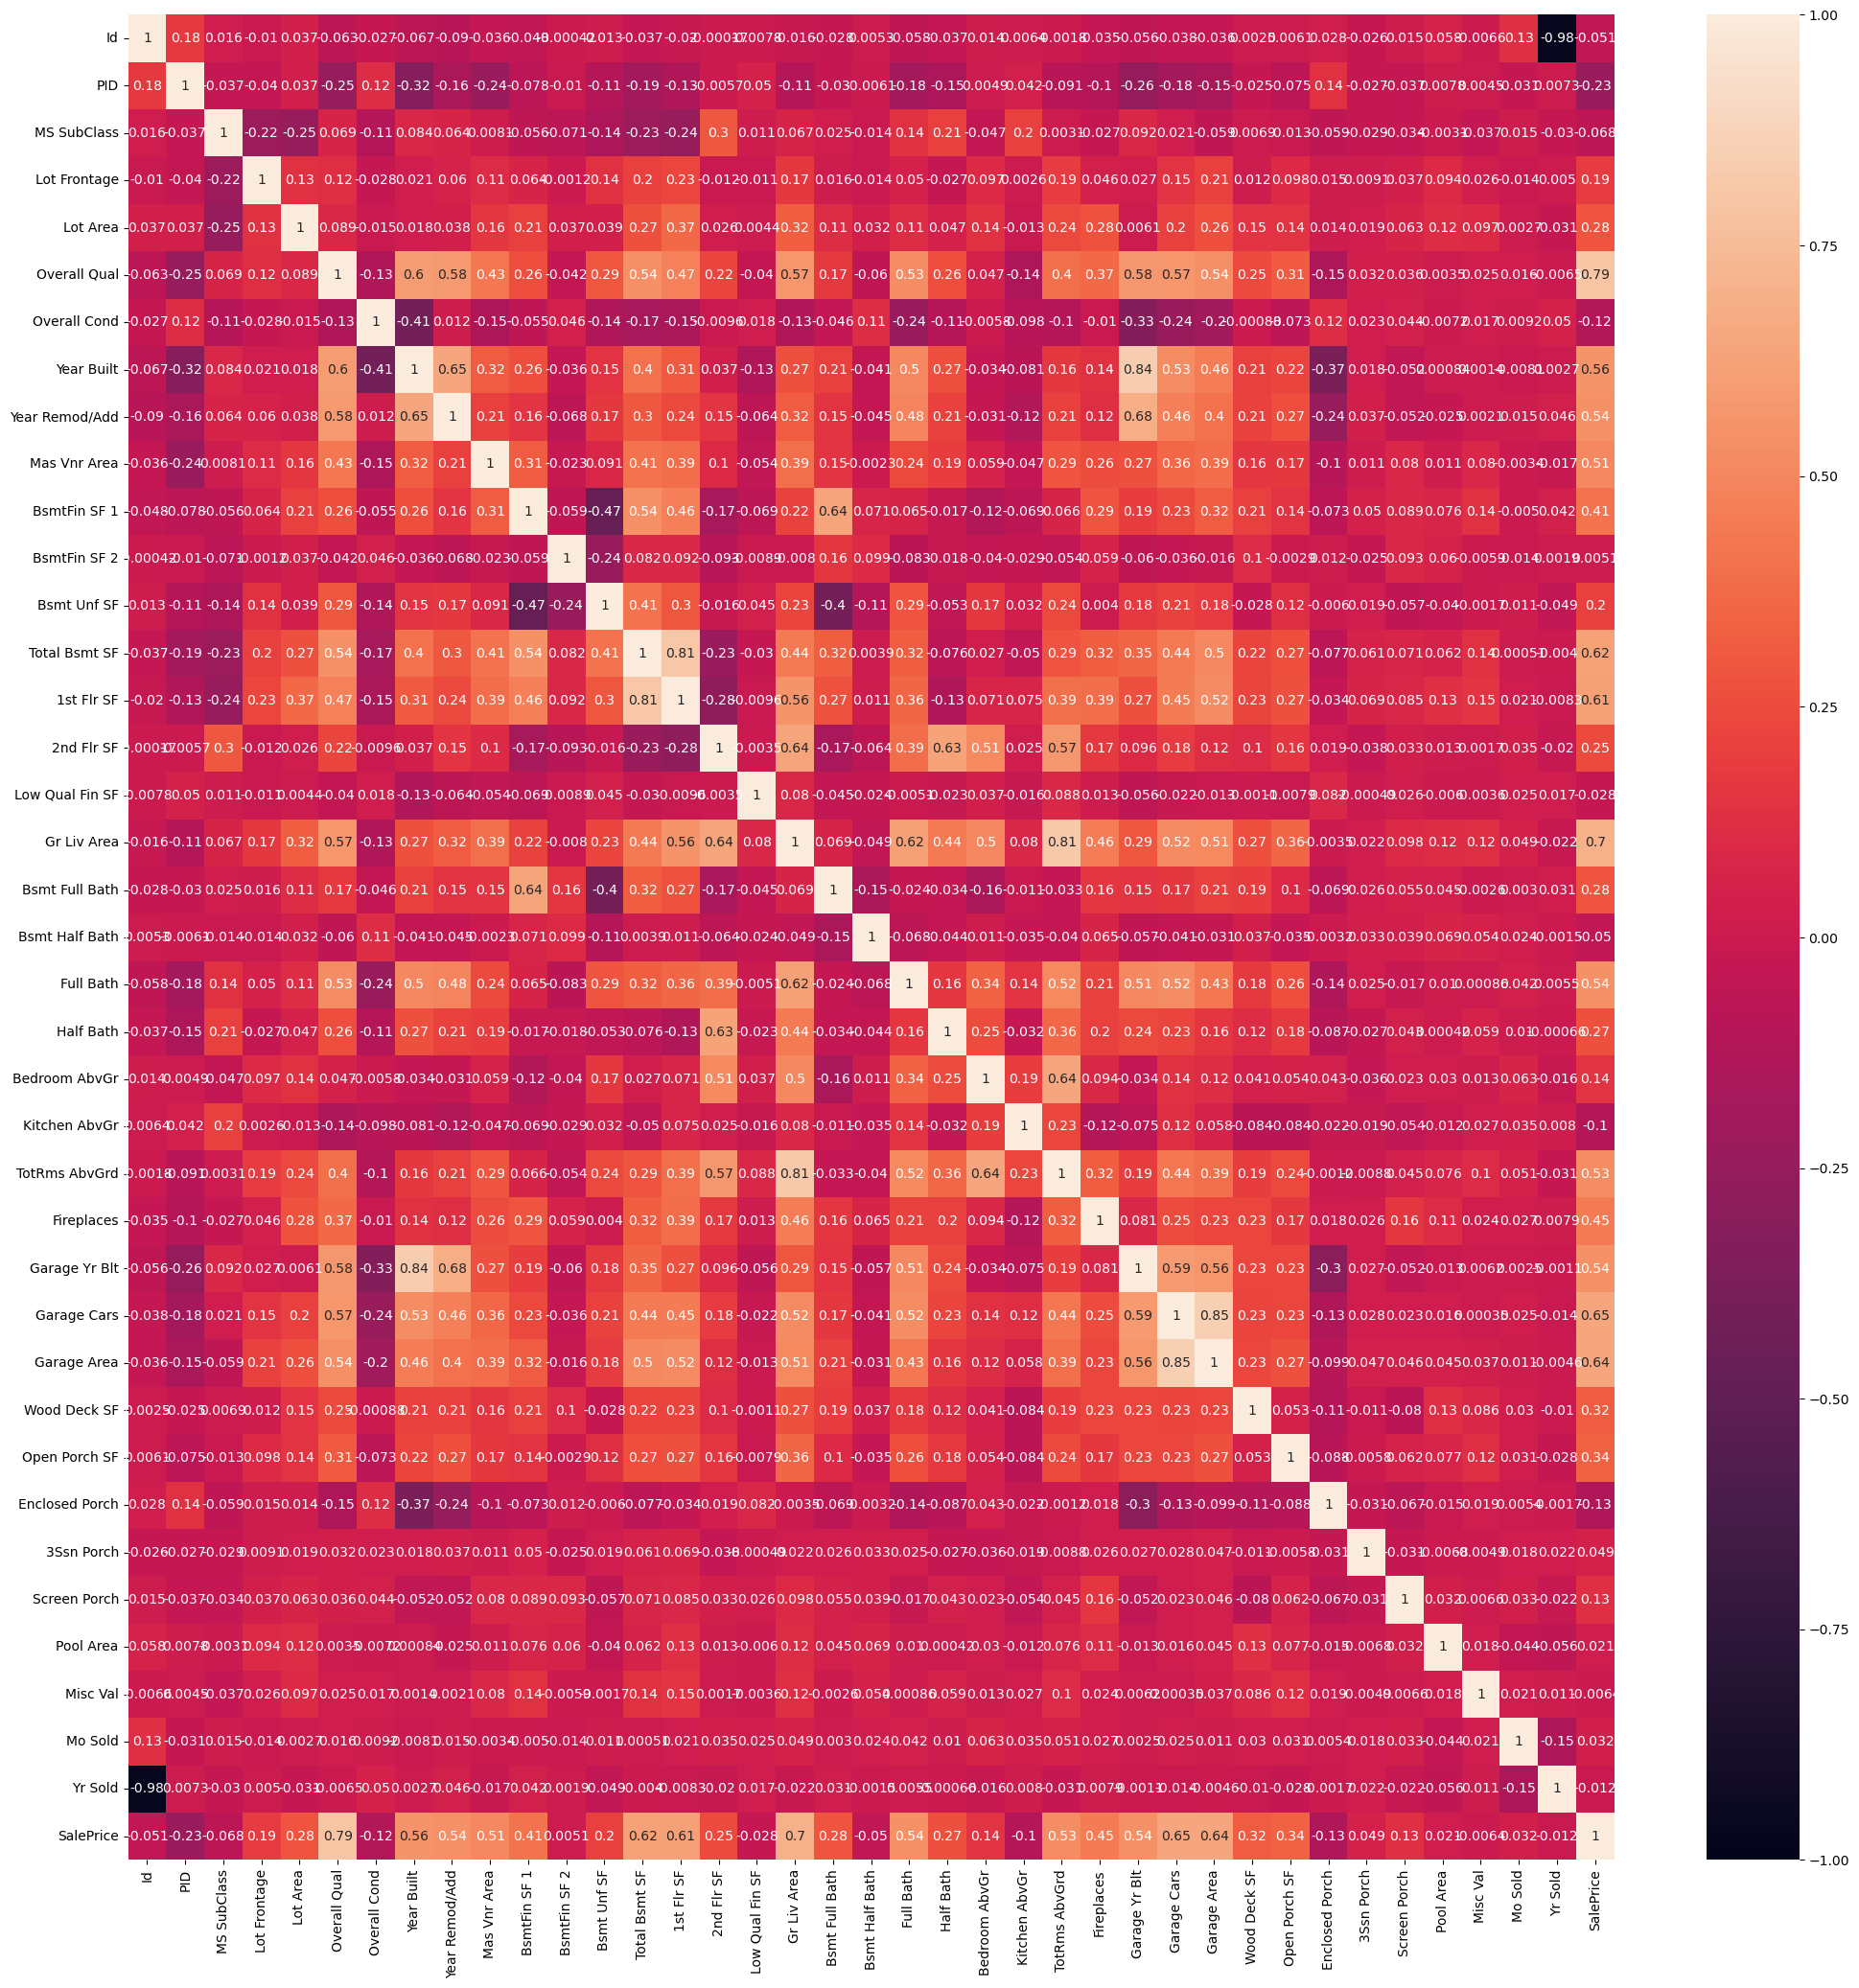

In [14]:
#Training Data
plt.figure(figsize = (25,25))

sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1)

<Axes: >

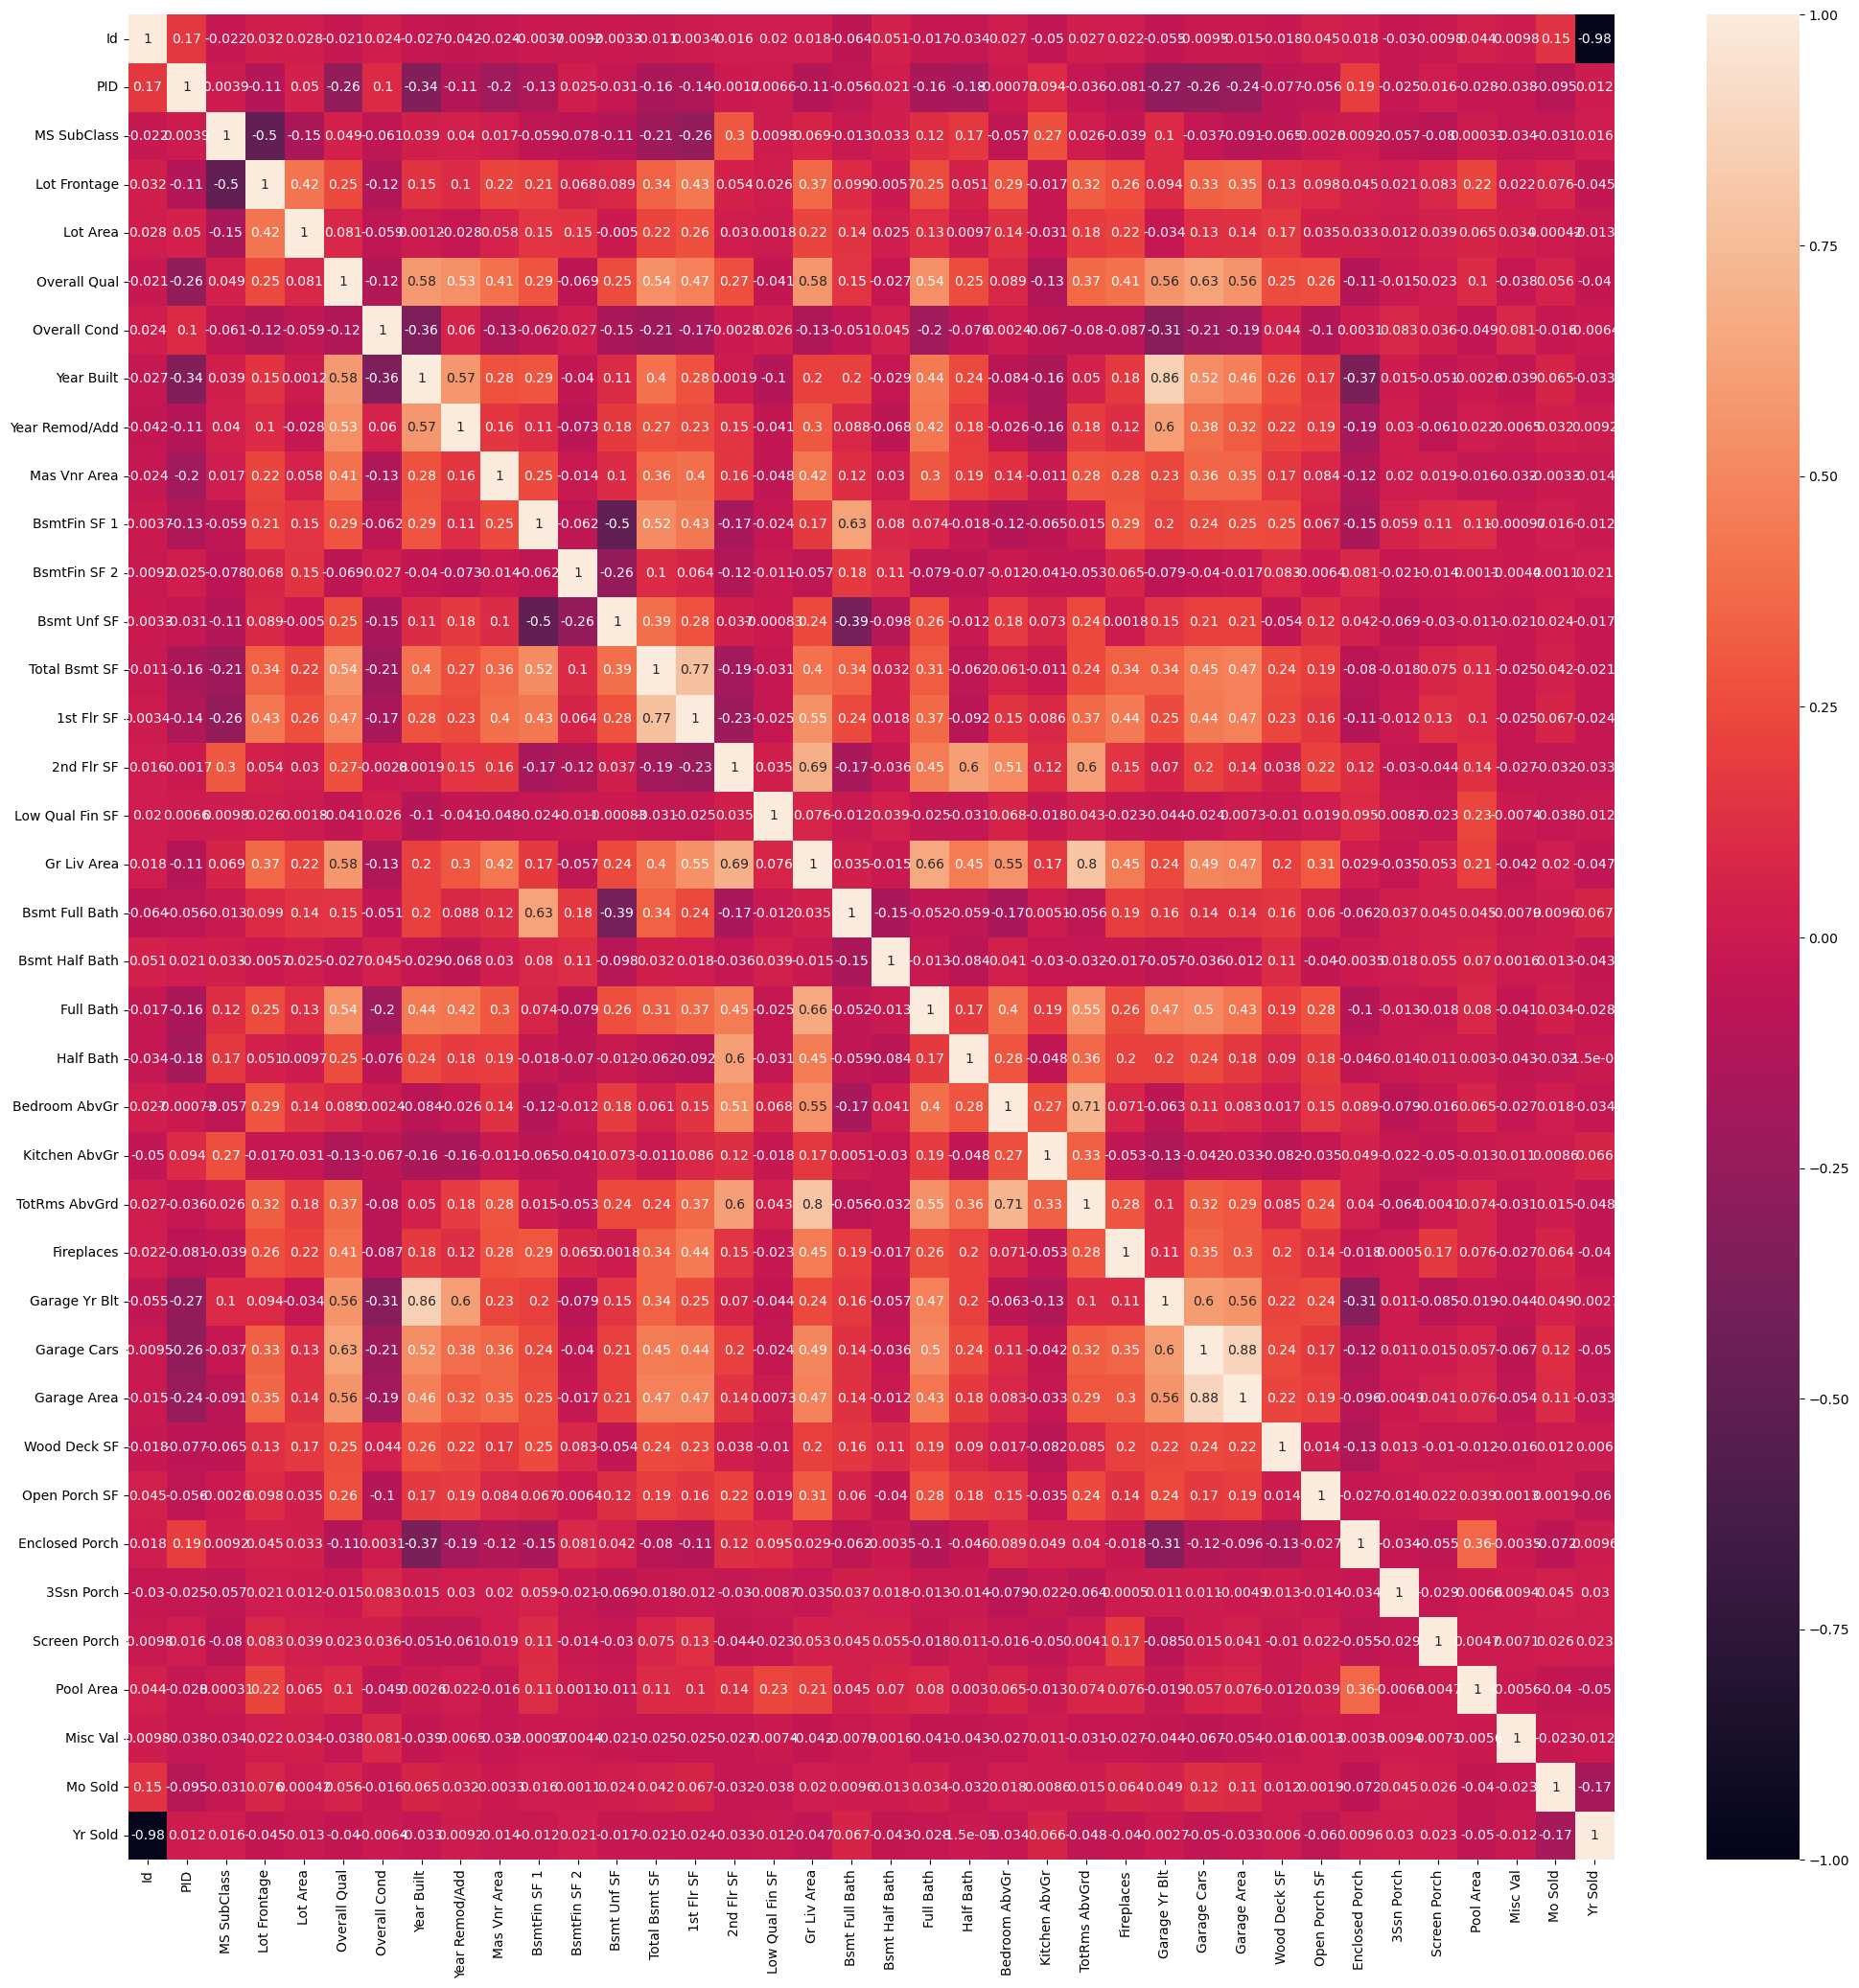

In [15]:
# Testing Data

plt.figure(figsize = (25,25))

sns.heatmap(kaggle_data.corr(numeric_only=True), annot = True, vmin=-1, vmax=1)

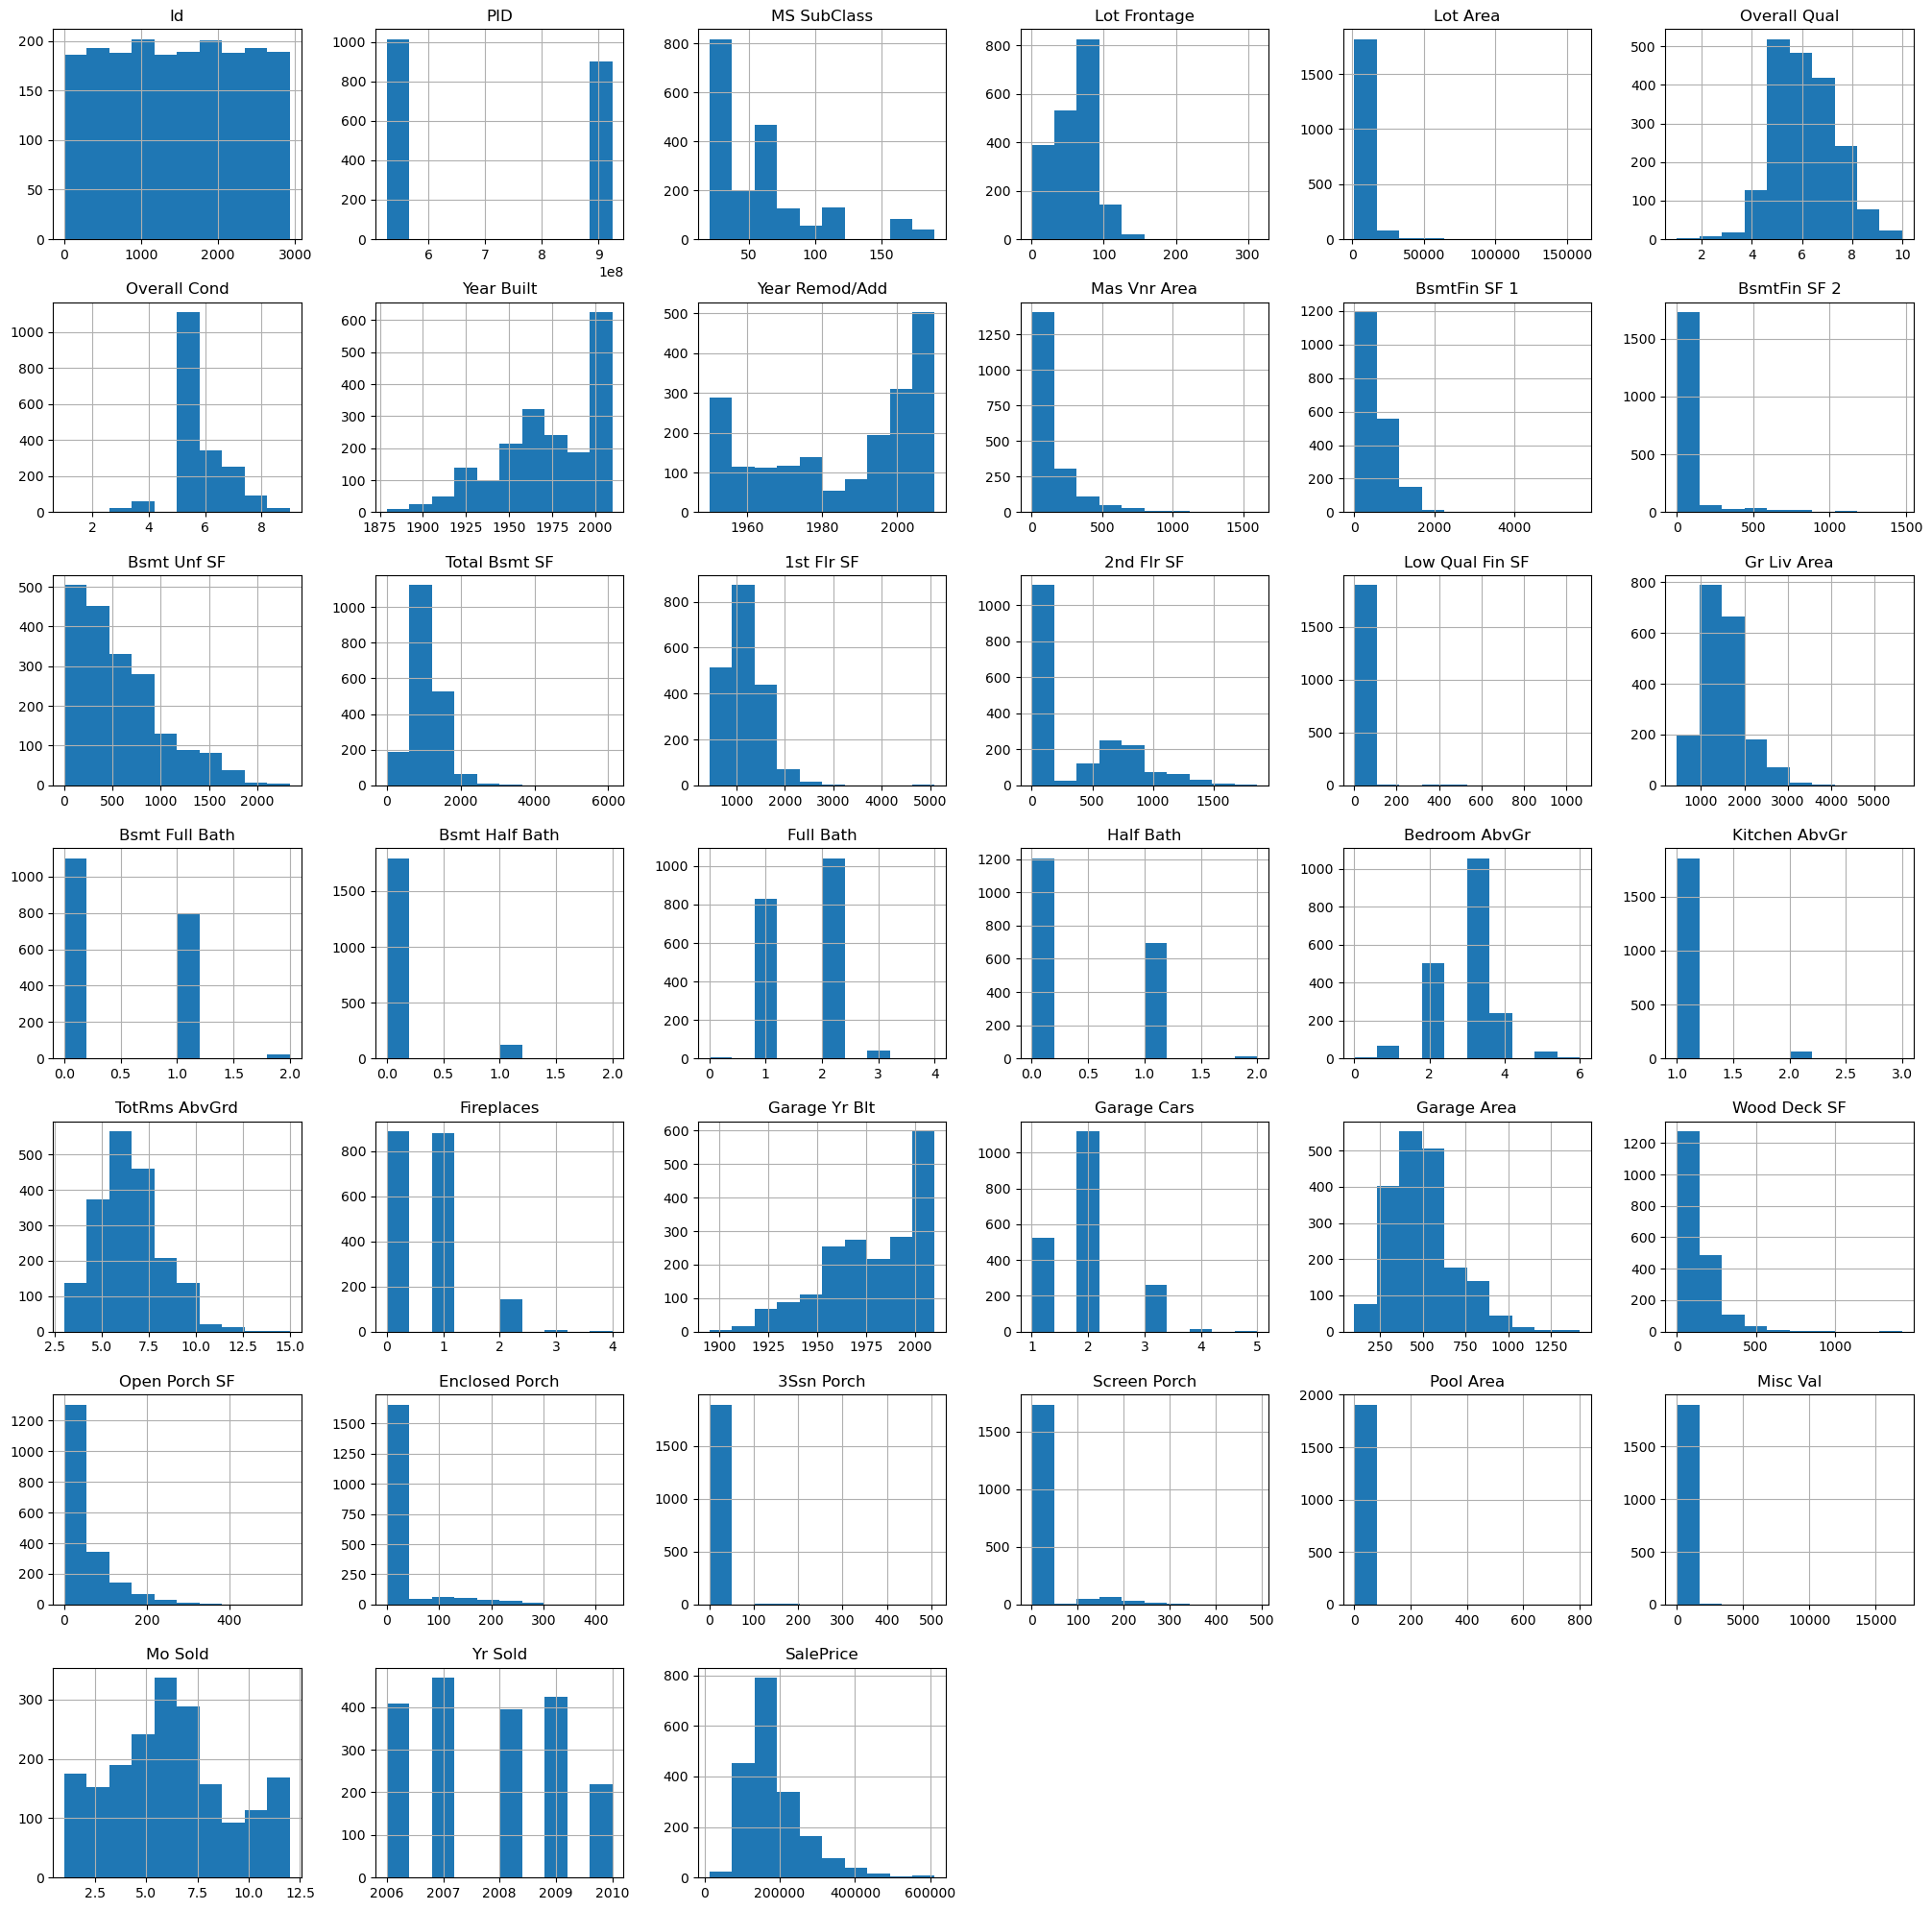

In [16]:
df.hist(figsize = (25, 25));

In [17]:
df['After 2000'] = (df['Year Built'] >= 2000) | (df['Year Remod/Add'] >= 2000)
df['After 2000'].value_counts()

After 2000
False    1197
True      718
Name: count, dtype: int64

In [18]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       '

In [19]:
# Assuming df is your DataFrame
non_numeric_columns = df.select_dtypes(exclude='number').columns

print(non_numeric_columns)

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'After 2000'], dtype='object')


In [20]:
result = df.groupby(['Gr Liv Area', 'After 2000'])['SalePrice'].mean()
print(result)

Gr Liv Area  After 2000
438          False          60000.0
480          False          35311.0
492          False          61500.0
498          False          35000.0
520          False          68500.0
                             ...   
3608         False         475000.0
3672         False         415000.0
3820         False         284700.0
5095         True          183850.0
5642         True          160000.0
Name: SalePrice, Length: 1263, dtype: float64


In [21]:
df['Exter Qual']

0       Gd
1       Gd
2       TA
3       TA
4       TA
        ..
2046    Gd
2047    TA
2048    TA
2049    TA
2050    TA
Name: Exter Qual, Length: 1915, dtype: object

In [22]:
# Assuming df is your DataFrame
df['Exter Qual'] = df['Exter Qual'].isin(['Gd', 'Ex'])

# Convert boolean values to 1 and 0
df['Exter Qual'] = df['Exter Qual'].astype(int)

In [23]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.231241
Enclosed Porch    -0.127410
Overall Cond      -0.124639
Kitchen AbvGr     -0.104482
MS SubClass       -0.068130
Id                -0.050652
Bsmt Half Bath    -0.049627
Low Qual Fin SF   -0.027817
Yr Sold           -0.012254
Misc Val          -0.006442
BsmtFin SF 2       0.005142
Pool Area          0.020808
Mo Sold            0.032268
3Ssn Porch         0.048533
Screen Porch       0.126428
Bedroom AbvGr      0.144725
Lot Frontage       0.186134
Bsmt Unf SF        0.196280
2nd Flr SF         0.248781
Half Bath          0.270290
Bsmt Full Bath     0.281479
Lot Area           0.284442
Wood Deck SF       0.316732
Open Porch SF      0.338251
BsmtFin SF 1       0.412059
After 2000         0.437875
Fireplaces         0.452666
Mas Vnr Area       0.505862
TotRms AbvGrd      0.525312
Garage Yr Blt      0.539348
Year Remod/Add     0.543454
Full Bath          0.544144
Year Built         0.559330
1st Flr SF         0.614517
Total Bsmt SF      0.622894
Exter Qual         0

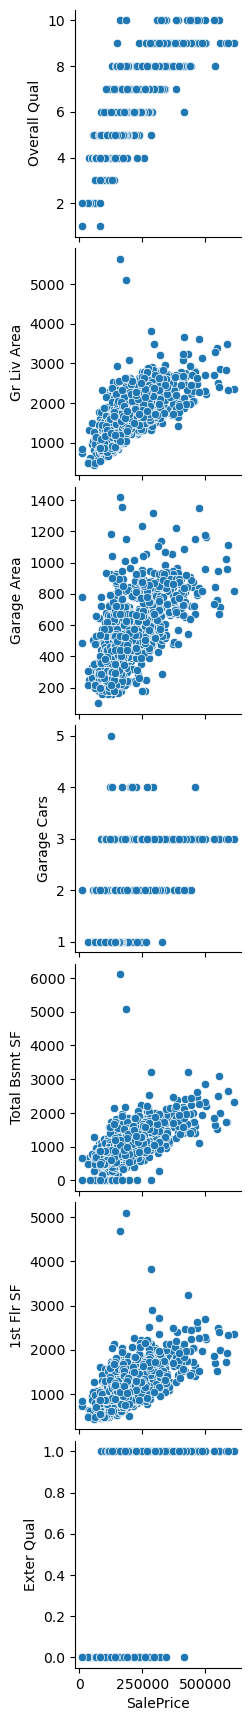

In [45]:
sns.pairplot(df, y_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars','Total Bsmt SF','1st Flr SF','Exter Qual'], x_vars = ['SalePrice'])

In [25]:
print(2051-1915)
df.shape
#only down 136 vals, no need to worry

136


(1915, 82)

In [179]:
#After 2000 is our only dummy variable

features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars','Total Bsmt SF','1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF','After 2000','Mo Sold','Exter Qual']

X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    train_size=0.90)

In [180]:
# Scaling Added Error due to Machine Rounding
# ss = StandardScaler()

# X_train = ss.fit_transform(X_train)

# X_test = ss.transform(X_test)

In [181]:
# Instantiate a linear regression model.
linmod = LinearRegression()

# Fit our linear regression model to the training data.
linmod.fit(X_train,y_train)

LinearRegression()

In [182]:
lasso = Lasso()

ridge = Ridge()

In [183]:
lasso.fit(X_train,y_train)

Lasso()

In [184]:
ridge.fit(X_train,y_train)

Ridge()

In [185]:
# Print out intercept and coefficients.
print(f'Intercept: {linmod.intercept_}')
print(f'Coefficient: {linmod.coef_}')

Intercept: -671988.3156268068
Coefficient: [ 1.83208942e+04  3.46600924e+01  3.04353612e+01  8.51046058e+03
  5.93553860e+00  1.42565213e+01  1.39128863e+02  2.23850305e+02
 -3.68945415e+03 -5.89228995e+01  2.30343847e+03  3.44392938e+01
  8.80848680e+03  1.81449957e+01 -5.37273519e+00  8.01991038e+03
  3.02611809e+02  1.04079439e+04]


In [186]:
# We Go Ridge

In [187]:
#predict
prediction_lin = linmod.predict(X_test)

#actual
actual = y_test

train_score_lin = linmod.score(X_train, y_train)
test_score_lin = linmod.score(X_test, y_test)

print("The train score for lin model is {}".format(train_score_lin))
print("The test score for lin model is {}".format(test_score_lin))

The train score for lin model is 0.8029609597946776
The test score for lin model is 0.8534224878567216


In [188]:
# And same for the other models 
#predict
prediction_lasso = lasso.predict(X_test)

#actual
actual = y_test

train_score_lasso = lasso.score(X_train, y_train)
test_score_lasso = lasso.score(X_test, y_test)

print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))

The train score for lasso model is 0.8029609535896779
The test score for lasso model is 0.8534230971512108


In [189]:
#predict
prediction_ridge = ridge.predict(X_test)

#actual
actual = y_test

train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)

print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.8029608282913329
The test score for ridge model is 0.8534293984525743


In [190]:
# Although nearly identical, we will use Ridge; model is underfit needs more fitting

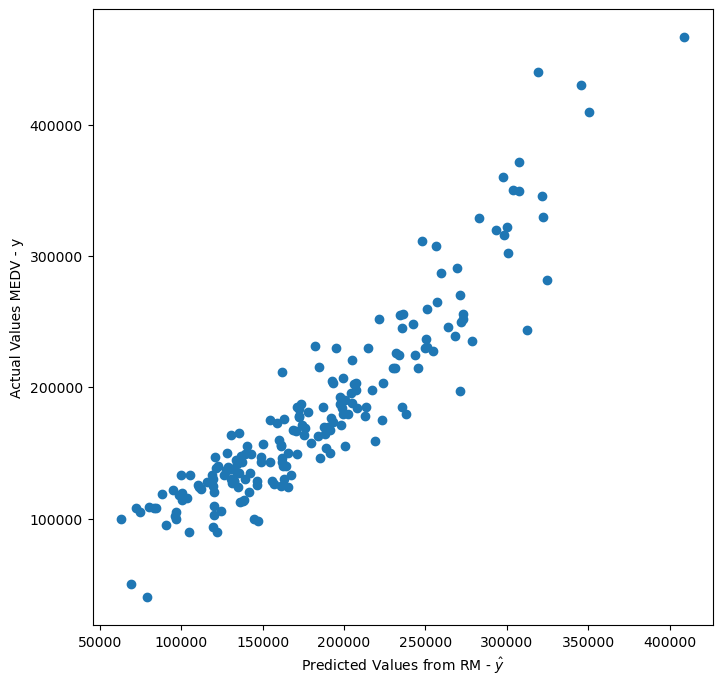

[ 1.83153817e+04  3.46751587e+01  3.05661777e+01  8.46199773e+03
  5.94896771e+00  1.42539277e+01  1.39475146e+02  2.24802182e+02
 -3.66681804e+03 -5.89229515e+01  2.30118647e+03  3.44524144e+01
  8.79441198e+03  1.81394512e+01 -5.37355714e+00  7.98594193e+03
  3.02493342e+02  1.03661013e+04]
-674516.4768299379


In [191]:
plt.figure(figsize=(8,8))
plt.scatter(prediction_ridge, actual)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

# print(np.sqrt(mean_squared_error(subset['MEDV'], predictions)))
print(ridge.coef_)

print(ridge.intercept_)

# Other Fits

# Metrics Section

In [192]:
residuals = y_test - prediction_ridge # Insert your prediction_model parameter here
residuals

1317     37051.892922
122      -3699.045946
339     -19852.991938
840       -194.626182
447     -20725.572051
354      -7473.234014
75      -25896.745288
774      -6269.588097
662       5519.540919
1117     57453.000433
1826      8374.473590
900      10334.214166
929     -34261.850731
142      -4169.867585
1689     -9815.605650
267      12151.290581
1476     19646.495465
788       9679.535026
408     -38619.505524
1433    -73984.961825
1828     -3611.340868
376      -5643.235457
1729    -48443.473979
572     -32795.951685
1116    -17045.364484
642     -20326.340540
149      10099.329005
1580      -630.219668
1403      7048.865273
1631     15187.411525
1524     -2030.275032
654      21826.763922
248      28920.479055
1907     13416.416379
1424     -4069.170718
1362    -21031.503323
1340    -22788.408087
1756    -24006.581164
570      11108.125768
1702     31323.829625
618      10063.465850
971      15115.725049
1599     29484.335094
1868     12993.170811
1615     14342.999122
1454      

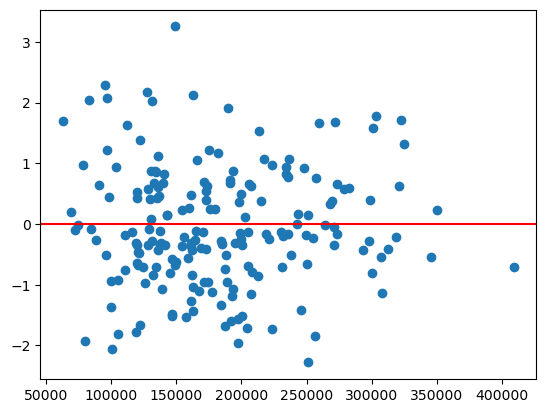

In [193]:
plt.scatter(prediction_ridge, np.random.randn(len(prediction_ridge)))
plt.axhline(0, color='r')

In [194]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction_ridge)

21716.11689230271

In [195]:
# Calculate RSS by hand
sum((y_test - prediction_ridge)**2)

149993028031.60248

In [196]:
# MSE via sklearn.metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction_ridge)

781213687.6645961

In [197]:
# RMSE by hand
np.sqrt(sum((y_test - prediction_ridge)**2)/len(y_test))

27950.20013639609